# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'sma' : 200,
    'band' : 3.0
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [6]:
s.tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
45,2004-11-04,1161.67,2007-08-15,1406.70,245.03,209500.57,855,1193685.60,LONG,^GSPC
46,2007-09-18,1519.78,2007-11-19,1433.27,-86.51,-68515.93,792,1125169.67,LONG,^GSPC
47,2009-06-11,944.89,2010-05-26,1067.95,123.06,147794.98,1201,1272964.65,LONG,^GSPC
48,2010-10-05,1160.75,2011-08-04,1200.07,39.32,43448.54,1105,1316413.20,LONG,^GSPC
49,2012-01-18,1308.04,2015-08-21,1970.89,662.85,672129.88,1014,1988543.07,LONG,^GSPC
50,2016-04-13,2082.42,2018-10-24,2656.10,573.68,550159.29,959,2538702.36,LONG,^GSPC
51,2019-03-21,2854.88,2020-02-28,2954.22,99.34,88611.36,892,2627313.72,LONG,^GSPC
52,2020-06-03,3122.87,2022-02-22,4304.76,1181.89,997514.86,844,3624828.58,LONG,^GSPC
53,2022-03-29,4631.60,2022-04-22,4271.78,-359.82,-282099.12,784,3342729.46,LONG,^GSPC
54,2023-01-31,4076.60,2023-12-21,4732.65,656.05,539272.94,822,3882002.40,LONG,^GSPC


In [7]:
s.dbal.tail(10)

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-12-08,3786556.41,3786556.41,3786556.41,822,1764.18,1.00,-
2023-12-11,3801409.81,3801409.81,3801409.81,822,1764.18,1.00,-
2023-12-12,3818885.74,3818885.74,3818885.74,822,1764.18,1.00,-
2023-12-13,3870992.03,3870992.03,3870992.03,822,1764.18,1.00,-
2023-12-14,3881234.11,3881234.11,3881234.11,822,1764.18,1.00,-
2023-12-15,3880938.31,3880938.31,3880938.31,822,1764.18,1.00,-
2023-12-18,3898504.54,3898504.54,3898504.54,822,1764.18,1.00,-
2023-12-19,3921364.41,3921364.41,3921364.41,822,1764.18,1.00,-
2023-12-20,3863807.96,3863807.96,3863807.96,822,1764.18,1.00,-


Display all available stats

In [8]:
pf.print_full(s.stats)

start                                                  1928-10-16
end                                                    2023-12-21
beginning_balance                                           10000
ending_balance                                         3892002.40
total_net_profit                                       3882002.40
gross_profit                                           4285425.04
gross_loss                                             -403422.65
profit_factor                                               10.62
return_on_initial_capital                                38820.02
annual_return_rate                                           6.47
trading_period                           95 years 2 months 5 days
pct_time_in_market                                          65.96
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=s.options['use_adj'])
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

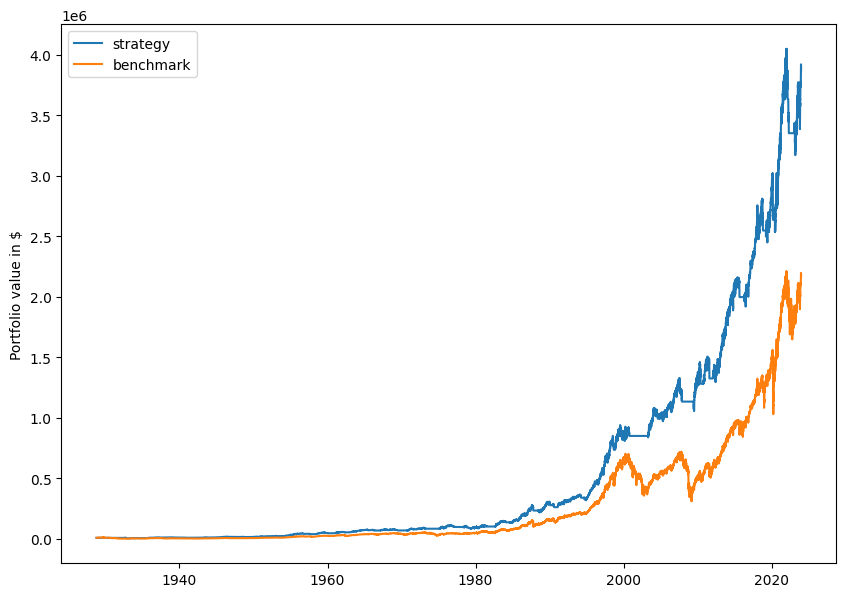

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

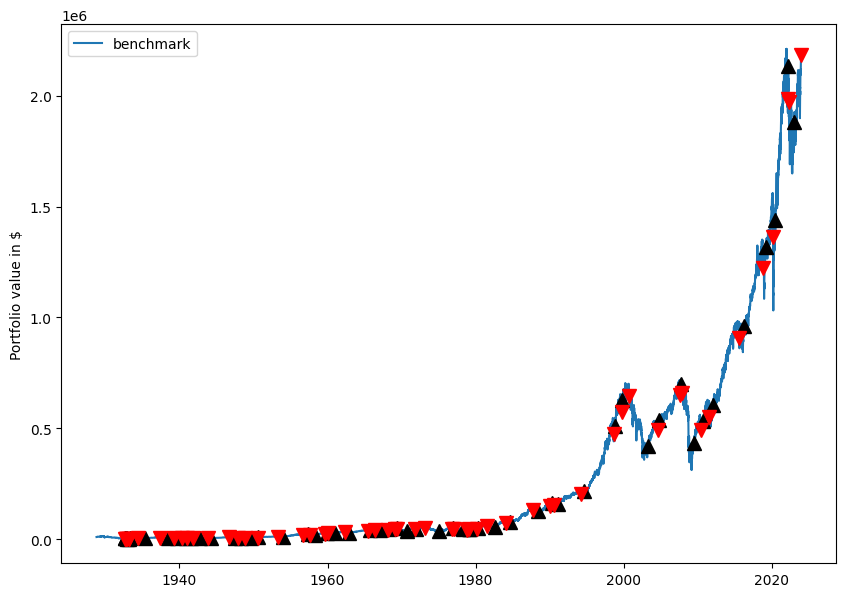

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

In [12]:
print('trading period:  {} to {}'.format(s.stats['start'], s.stats['end']))
df = pf.summary(s.stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1928-10-16 to 2023-12-21


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$3,892,002.40","$2,181,752.85"
total_net_profit,"$3,882,002.40","$2,171,752.85"
gross_profit,"$4,285,425.04","$2,171,752.85"
gross_loss,"-$403,422.65",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.47,5.82
max_closed_out_drawdown,-52.93,-86.16
annualized_return_over_max_drawdown,0.12,0.07
best_month,27.02,61.49
worst_month,-27.06,-42.17
sharpe_ratio,0.58,0.39
sortino_ratio,0.59,0.49
monthly_std,3.29,5.33
annual_std,13.72,19.93


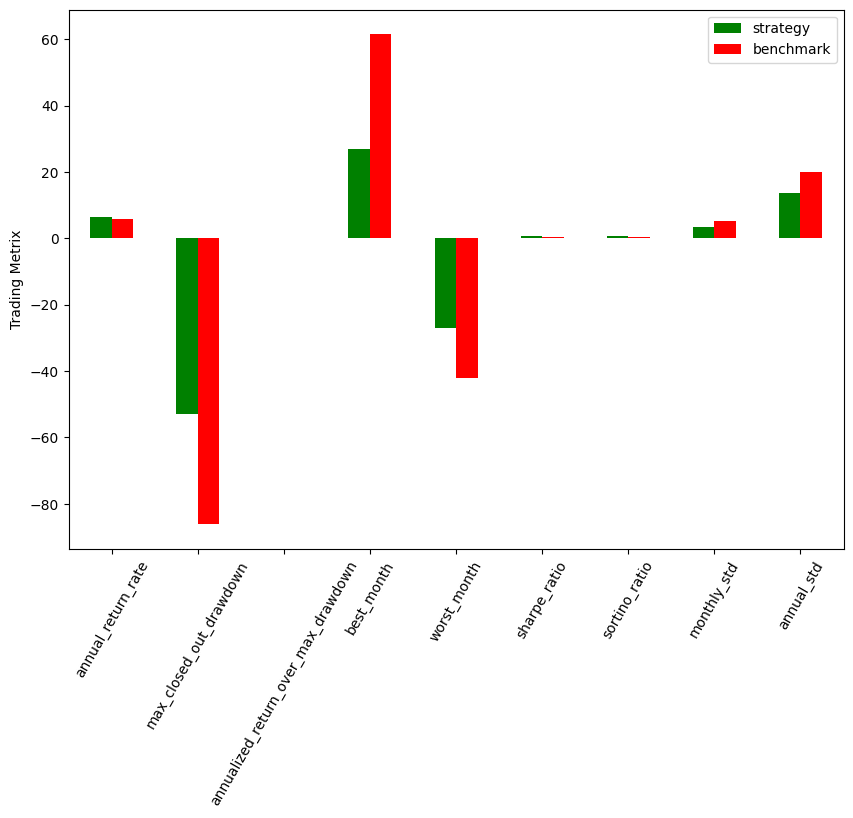

In [13]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Print the raw transaction log

In [14]:
pd.set_option('display.max_rows', len(s.rlog))
s.rlog

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1932-08-10,0,7.65,1307,entry,LONG,^GSPC
1,1932-08-12,1,7.00,1307,exit,LONG,^GSPC
2,1932-08-16,2,7.68,1191,entry,LONG,^GSPC
3,1932-10-10,3,6.42,1191,exit,LONG,^GSPC
4,1932-10-14,4,7.13,1072,entry,LONG,^GSPC
5,1932-11-02,5,6.52,1072,exit,LONG,^GSPC
6,1932-11-07,6,7.24,966,entry,LONG,^GSPC
7,1932-12-02,7,6.47,966,exit,LONG,^GSPC
8,1932-12-07,8,6.89,907,entry,LONG,^GSPC
9,1933-02-14,9,6.32,907,exit,LONG,^GSPC
